In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/air-quality-data-in-india/air-quality-india.csv


**Importing Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
sns.set()

**Import Data and Analysis**

In [3]:
df=pd.read_csv("/kaggle/input/air-quality-data-in-india/air-quality-india.csv")
df

,Timestamp,Year,Month,Day,Hour,PM2.5
0,2017-11-07 12:00:00,2017,11,7,12,64.51
1,2017-11-07 13:00:00,2017,11,7,13,69.95
2,2017-11-07 14:00:00,2017,11,7,14,92.79
3,2017-11-07 15:00:00,2017,11,7,15,109.66
4,2017-11-07 16:00:00,2017,11,7,16,116.50
...,...,...,...,...,...,...
36187,2022-06-04 11:00:00,2022,6,4,11,35.89
36188,2022-06-04 12:00:00,2022,6,4,12,33.83
36189,2022-06-04 13:00:00,2022,6,4,13,33.05
36190,2022-06-04 14:00:00,2022,6,4,14,35.29


In [4]:
df.head()

,Timestamp,Year,Month,Day,Hour,PM2.5
0,2017-11-07 12:00:00,2017,11,7,12,64.51
1,2017-11-07 13:00:00,2017,11,7,13,69.95
2,2017-11-07 14:00:00,2017,11,7,14,92.79
3,2017-11-07 15:00:00,2017,11,7,15,109.66
4,2017-11-07 16:00:00,2017,11,7,16,116.50


In [5]:
df.tail()

,Timestamp,Year,Month,Day,Hour,PM2.5
36187,2022-06-04 11:00:00,2022,6,4,11,35.89
36188,2022-06-04 12:00:00,2022,6,4,12,33.83
36189,2022-06-04 13:00:00,2022,6,4,13,33.05
36190,2022-06-04 14:00:00,2022,6,4,14,35.29
36191,2022-06-04 15:00:00,2022,6,4,15,40.67


In [6]:
df.shape

(36192, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36192 entries, 0 to 36191
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  36192 non-null  object 
 1   Year       36192 non-null  int64  
 2   Month      36192 non-null  int64  
 3   Day        36192 non-null  int64  
 4   Hour       36192 non-null  int64  
 5   PM2.5      36192 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 1.7+ MB


In [8]:
df.isnull().sum()

Timestamp    0
Year         0
Month        0
Day          0
Hour         0
PM2.5        0
dtype: int64

In [9]:
df.describe().T.style.background_gradient(cmap="Blues")

,count,mean,std,min,25%,50%,75%,max
Year,36192.000000,2019.682278,1.345011,2017.000000,2019.000000,2020.000000,2021.000000,2022.000000
Month,36192.000000,6.331841,3.593321,1.000000,3.000000,6.000000,10.000000,12.000000
Day,36192.000000,15.716401,8.859769,1.000000,8.000000,16.000000,23.000000,31.000000
Hour,36192.000000,11.477840,6.925088,0.000000,5.000000,11.000000,17.000000,23.000000
PM2.5,36192.000000,49.308429,24.863511,7.020000,28.080000,45.730000,64.520000,245.630000


In [10]:
print(df["PM2.5"].describe())

count    36192.000000
mean        49.308429
std         24.863511
min          7.020000
25%         28.080000
50%         45.730000
75%         64.520000
max        245.630000
Name: PM2.5, dtype: float64


In [11]:
df.nunique()

Timestamp    36192
Year             6
Month           12
Day             31
Hour            24
PM2.5         9202
dtype: int64

In [12]:
pd.DataFrame(df["Year"].value_counts())

,count
Year,
2020,8356
2021,8283
2019,7685
2018,7537
2022,3194
2017,1137


In [13]:
pd.DataFrame(df["Month"].value_counts().sort_index(ascending=True))

,count
Month,
1,3546
2,3250
3,3529
4,3083
5,3212
6,2743
7,2397
8,2492
9,2495


In [14]:
pd.DataFrame(df["Hour"].value_counts().sort_values(ascending=False))

,count
Hour,
8,1524
6,1523
5,1519
1,1518
23,1517
2,1515
9,1514
4,1514
7,1512


In [15]:
pd.DataFrame(df["PM2.5"].sort_values(ascending=False).head(15))

,PM2.5
7649,245.63
14836,234.83
7650,232.03
14837,230.05
7648,223.21
14835,219.07
7646,212.56
7647,207.41
23588,196.88
23593,193.80


In [16]:
# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract new features
df['Day_of_Week'] = df['Timestamp'].dt.dayofweek
df['Season'] = df['Month'].apply(lambda x: 'Winter' if x in [12, 1, 2] 
                                                 else 'Summer' if x in [3, 4, 5] 
                                                 else 'Monsoon' if x in [6, 7, 8]
                                                 else 'Autumn')

print(df.head())  # Check the new features

            Timestamp  Year  Month  Day  Hour   PM2.5  Day_of_Week  Season
0 2017-11-07 12:00:00  2017     11    7    12   64.51            1  Autumn
1 2017-11-07 13:00:00  2017     11    7    13   69.95            1  Autumn
2 2017-11-07 14:00:00  2017     11    7    14   92.79            1  Autumn
3 2017-11-07 15:00:00  2017     11    7    15  109.66            1  Autumn
4 2017-11-07 16:00:00  2017     11    7    16  116.50            1  Autumn


In [17]:
df

,Timestamp,Year,Month,Day,Hour,PM2.5,Day_of_Week,Season
0,2017-11-07 12:00:00,2017,11,7,12,64.51,1,Autumn
1,2017-11-07 13:00:00,2017,11,7,13,69.95,1,Autumn
2,2017-11-07 14:00:00,2017,11,7,14,92.79,1,Autumn
3,2017-11-07 15:00:00,2017,11,7,15,109.66,1,Autumn
4,2017-11-07 16:00:00,2017,11,7,16,116.50,1,Autumn
...,...,...,...,...,...,...,...,...
36187,2022-06-04 11:00:00,2022,6,4,11,35.89,5,Monsoon
36188,2022-06-04 12:00:00,2022,6,4,12,33.83,5,Monsoon
36189,2022-06-04 13:00:00,2022,6,4,13,33.05,5,Monsoon
36190,2022-06-04 14:00:00,2022,6,4,14,35.29,5,Monsoon


**Visulaization**

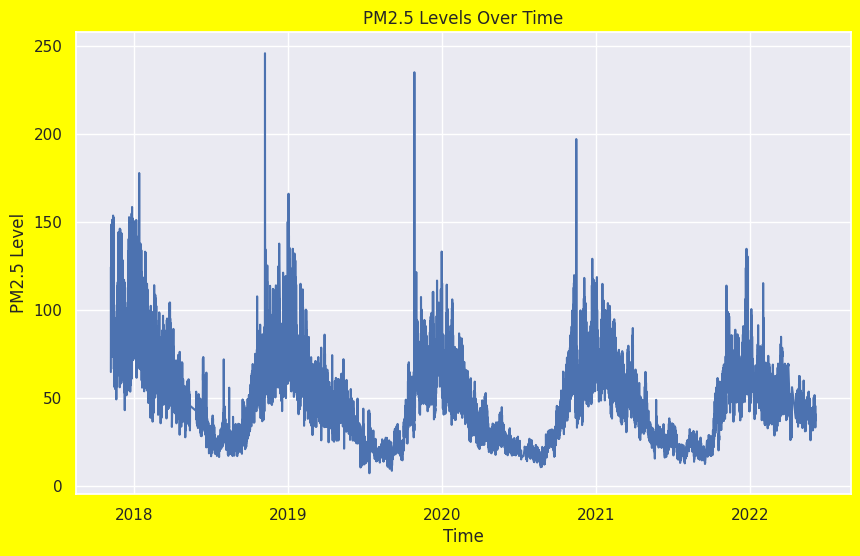

In [18]:
# Time series plot
plt.figure(figsize=(10,6),facecolor="yellow",
    edgecolor="red")
plt.plot(df['Timestamp'], df['PM2.5'])
plt.title('PM2.5 Levels Over Time')
plt.xlabel('Time')
plt.ylabel('PM2.5 Level')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


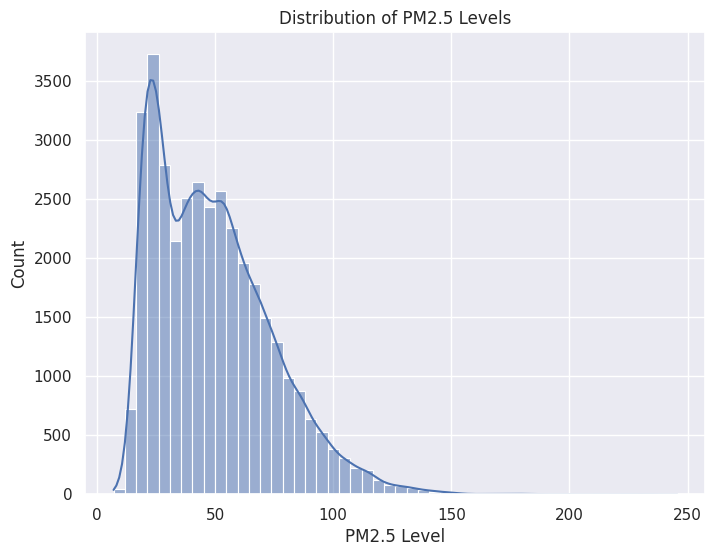

In [19]:
# Distribution plot
plt.figure(figsize=(8,6))
sns.histplot(df['PM2.5'], bins=50, kde=True)
plt.title('Distribution of PM2.5 Levels')
plt.xlabel('PM2.5 Level')
plt.show()


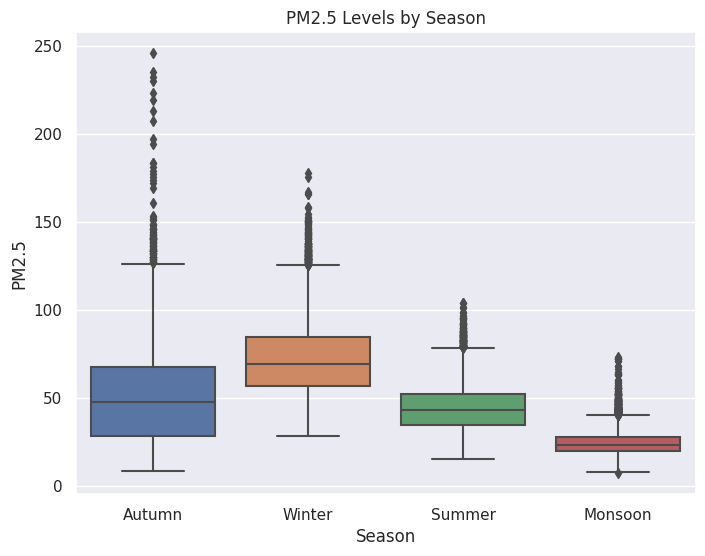

In [20]:
# Box plot by season
plt.figure(figsize=(8,6))
sns.boxplot(x='Season', y='PM2.5', data=df)
plt.title('PM2.5 Levels by Season')
plt.show()


* Winter and Autumn experience higher PM2.5 concentrations, with more frequent extreme pollution events (as seen by the outliers). Summer and Monsoon, especially Monsoon, experience cleaner air with fewer outliers and more consistent PM2.5 levels.

* This plot indicates that the air quality in India is significantly worse during Winter and Autumn, possibly due to factors like lower temperatures, industrial activities, or seasonal agricultural burning.

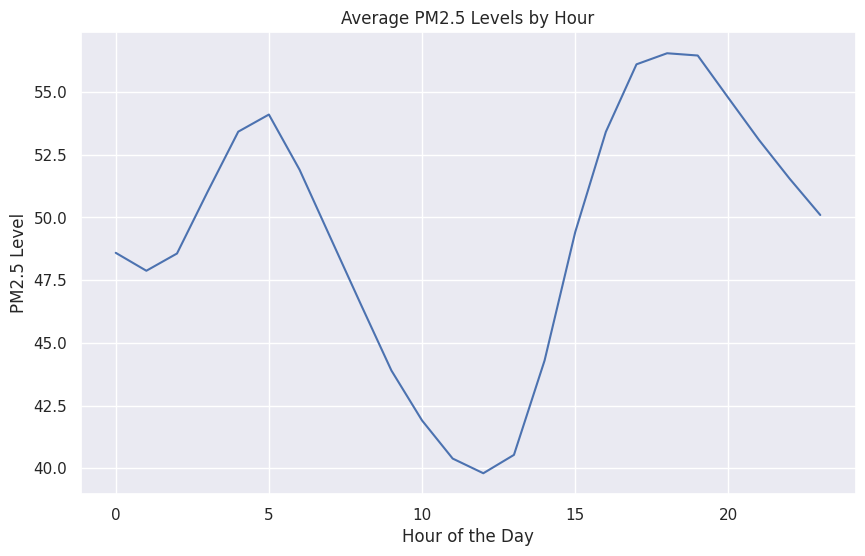

In [21]:
# Average PM2.5 by hour
hourly_avg = df.groupby('Hour')['PM2.5'].mean()
plt.figure(figsize=(10,6))
hourly_avg.plot()
plt.title('Average PM2.5 Levels by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('PM2.5 Level')
plt.show()

PM2.5 levels increase during the early morning hours (around 5 a.m.), peaking around this time. This may be due to increased vehicle traffic, industrial activity, and cold weather trapping pollutants closer to the ground (inversion effect). Levels gradually decrease during the late morning and early afternoon, reaching their lowest point around noon (around 11 a.m. to 1 p.m.). This may be due to pollutants being dispersed as the atmosphere warms and traffic/industrial activity slows.

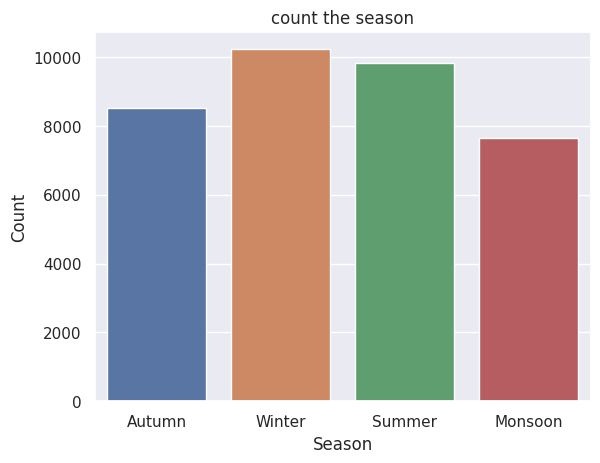

In [22]:
#count plot to season

sns.countplot(data =df ,x = "Season")
plt.title('count the season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Month', ylabel='count'>

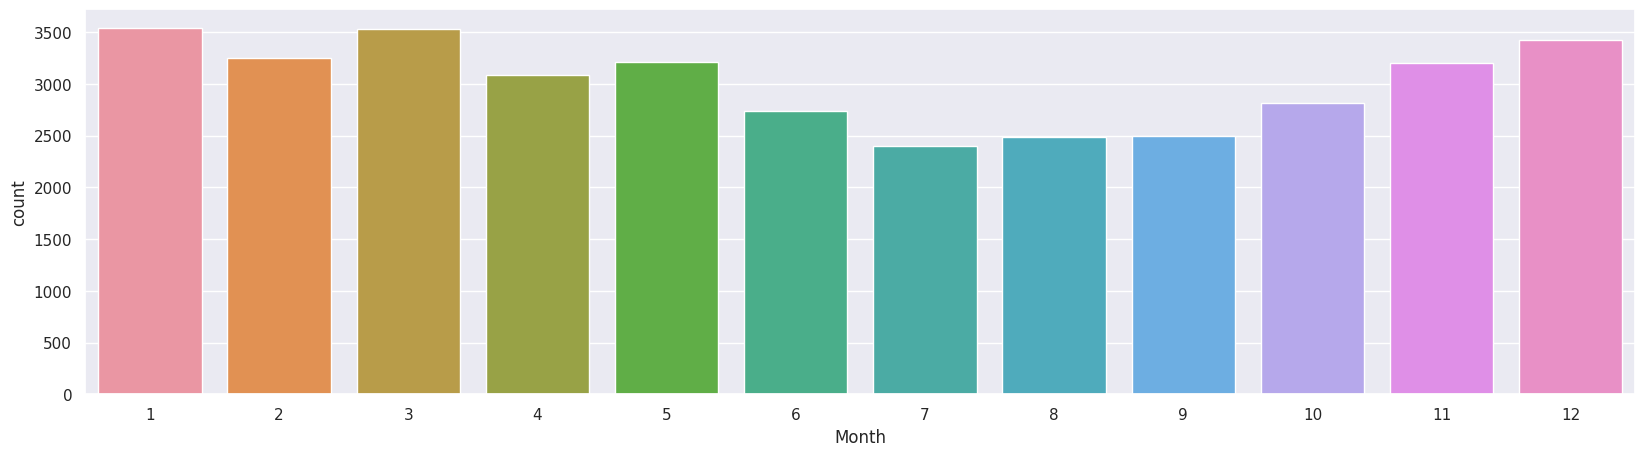

In [23]:
#count plot to month

sns.set(rc={"figure.figsize":(20,5)})
sns.countplot(data=df,x="Month")

<Axes: xlabel='Month', ylabel='PM2.5'>

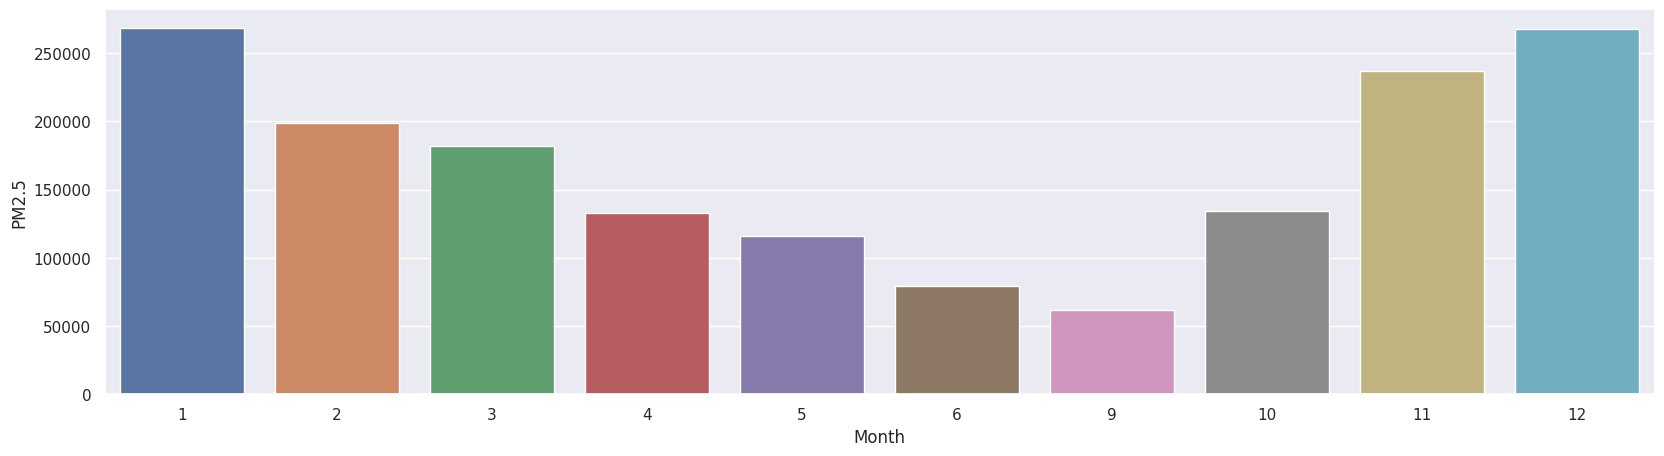

In [24]:
#This is a bar plot that displays the sum of PM2.5 levels for each month.
air = df.groupby(["Month"], as_index = False)["PM2.5"].sum().sort_values(by="PM2.5",ascending = False).head(10)

sns.set(rc={"figure.figsize":(20,5)})
sns.barplot(data = air,x = "Month",y = "PM2.5" )

This plot provides an overview of the total PM2.5 pollution over each month. Winter months (January and December) appear to have higher PM2.5 levels, whereas monsoon or summer months likely have lower levels. This analysis could be valuable for understanding seasonal trends in air pollution and for planning interventions during months with higher pollution levels.

<Axes: xlabel='Day_of_Week', ylabel='PM2.5'>

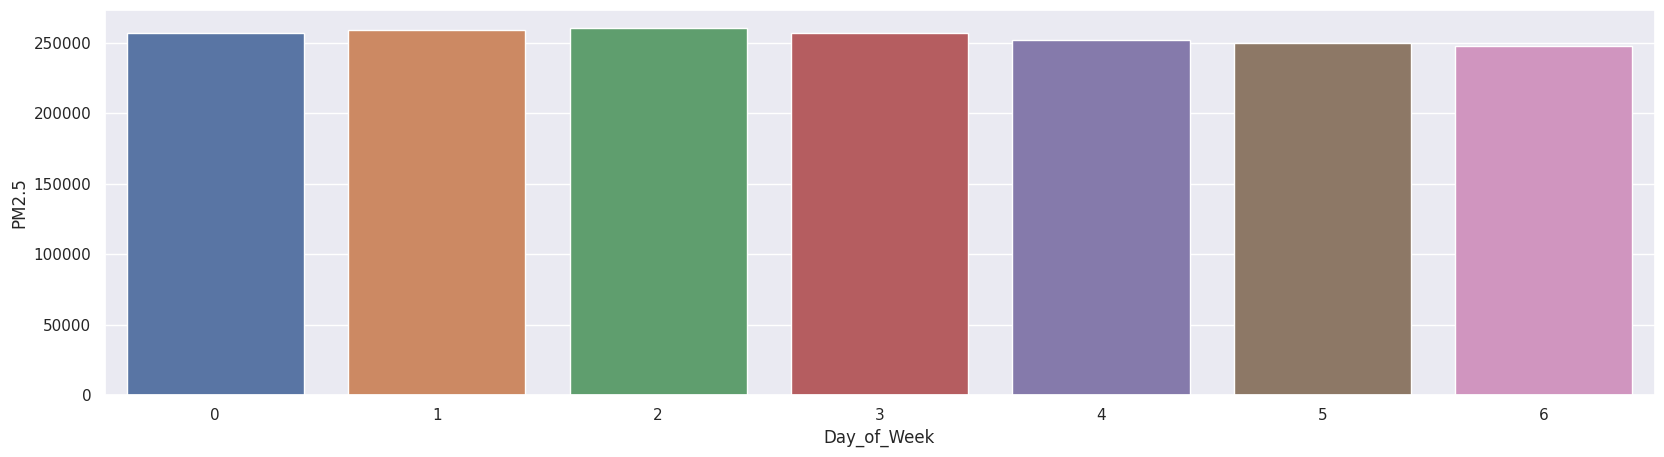

In [25]:
air = df.groupby(["Day_of_Week"], as_index = False)["PM2.5"].sum().sort_values(by="PM2.5",ascending = False).head(10)

sns.set(rc={"figure.figsize":(20,5)})
sns.barplot(data = air,x = "Day_of_Week",y = "PM2.5" )

This graph provides an overview of total PM2.5 pollution over each day of the week. PM2.5 levels appear to be very similar as you can see from the figure.

**Outliers**

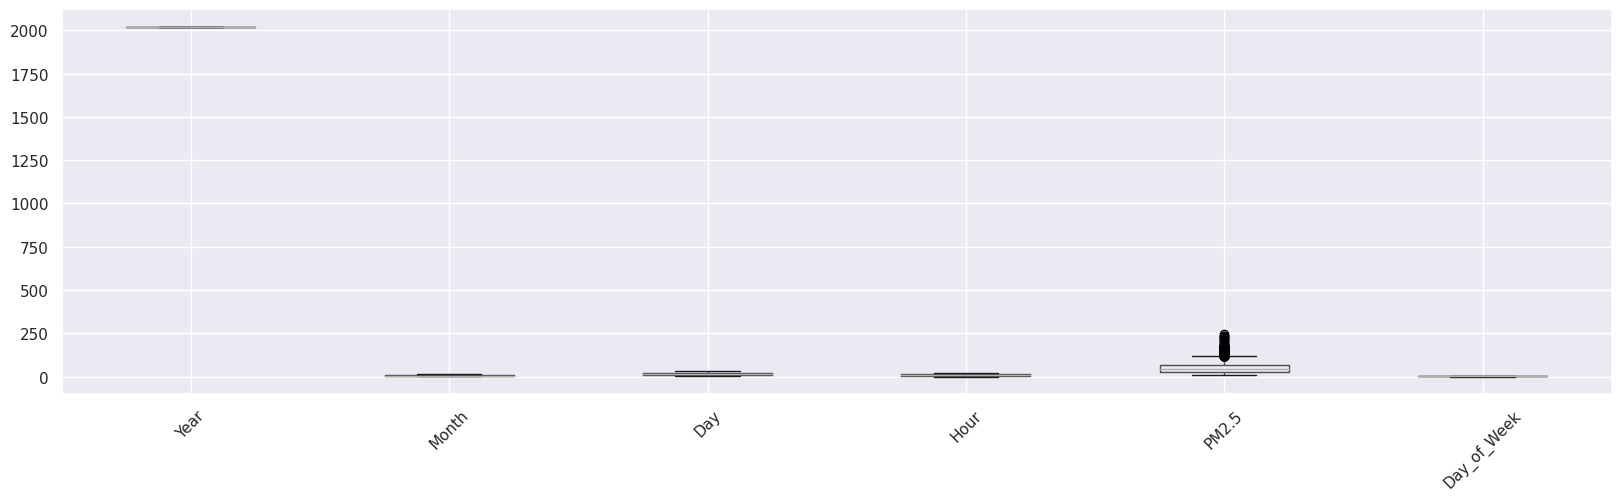

In [26]:
df.boxplot()
plt.xticks(rotation=45)
plt.show()

<Axes: >

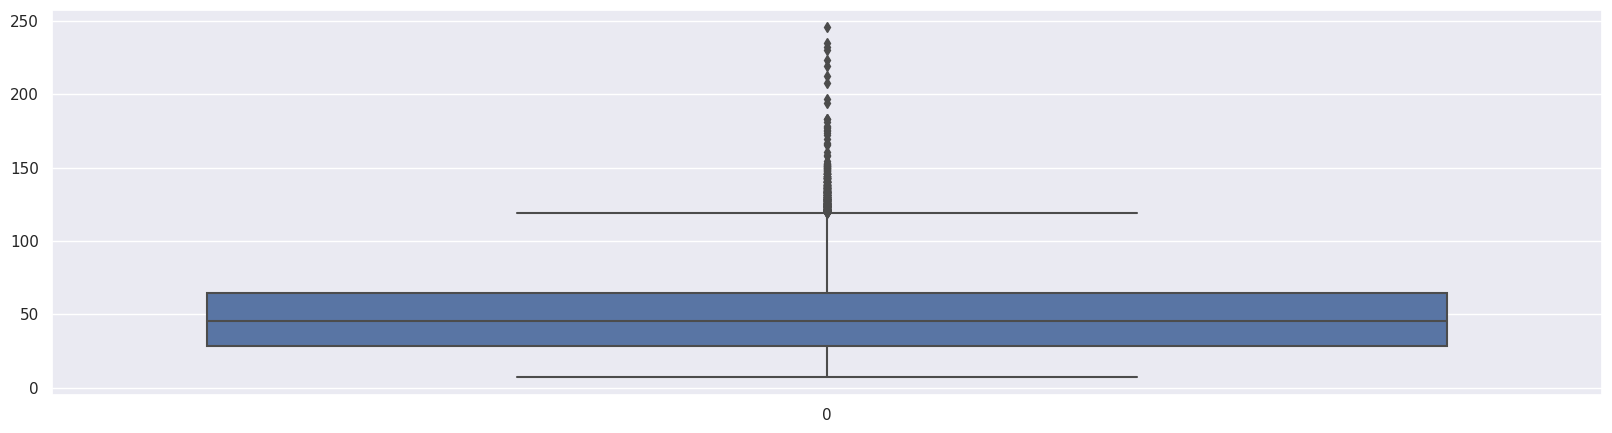

In [27]:
sns.boxplot(df["PM2.5"])

In [28]:
Q1 = df['PM2.5'].quantile(0.25)
Q3 = df['PM2.5'].quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df[~((df['PM2.5'] < (Q1 - 1.5 * IQR)) | (df['PM2.5'] > (Q3 + 1.5 * IQR)))]

In [29]:
df_no_outliers.head(2)

,Timestamp,Year,Month,Day,Hour,PM2.5,Day_of_Week,Season
0,2017-11-07 12:00:00,2017,11,7,12,64.51,1,Autumn
1,2017-11-07 13:00:00,2017,11,7,13,69.95,1,Autumn


**Handling Outliers**

In [30]:
upper_limit = df['PM2.5'].quantile(0.95)
lower_limit = df['PM2.5'].quantile(0.05)

df['PM2.5'] = np.where(df['PM2.5'] > upper_limit, upper_limit, df['PM2.5'])
df['PM2.5'] = np.where(df['PM2.5'] < lower_limit, lower_limit, df['PM2.5'])

In [31]:
df.head(8)

,Timestamp,Year,Month,Day,Hour,PM2.5,Day_of_Week,Season
0,2017-11-07 12:00:00,2017,11,7,12,64.5100,1,Autumn
1,2017-11-07 13:00:00,2017,11,7,13,69.9500,1,Autumn
2,2017-11-07 14:00:00,2017,11,7,14,92.7900,1,Autumn
3,2017-11-07 15:00:00,2017,11,7,15,95.2245,1,Autumn
4,2017-11-07 16:00:00,2017,11,7,16,95.2245,1,Autumn
5,2017-11-07 17:00:00,2017,11,7,17,95.2245,1,Autumn
6,2017-11-07 18:00:00,2017,11,7,18,95.2245,1,Autumn
7,2017-11-07 19:00:00,2017,11,7,19,95.2245,1,Autumn


In [32]:
df = df.drop(["Timestamp"],axis=1)
df

,Year,Month,Day,Hour,PM2.5,Day_of_Week,Season
0,2017,11,7,12,64.5100,1,Autumn
1,2017,11,7,13,69.9500,1,Autumn
2,2017,11,7,14,92.7900,1,Autumn
3,2017,11,7,15,95.2245,1,Autumn
4,2017,11,7,16,95.2245,1,Autumn
...,...,...,...,...,...,...,...
36187,2022,6,4,11,35.8900,5,Monsoon
36188,2022,6,4,12,33.8300,5,Monsoon
36189,2022,6,4,13,33.0500,5,Monsoon
36190,2022,6,4,14,35.2900,5,Monsoon


**Encoder**

In [33]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Season"] = le.fit_transform(df['Season'])

**Correlation**

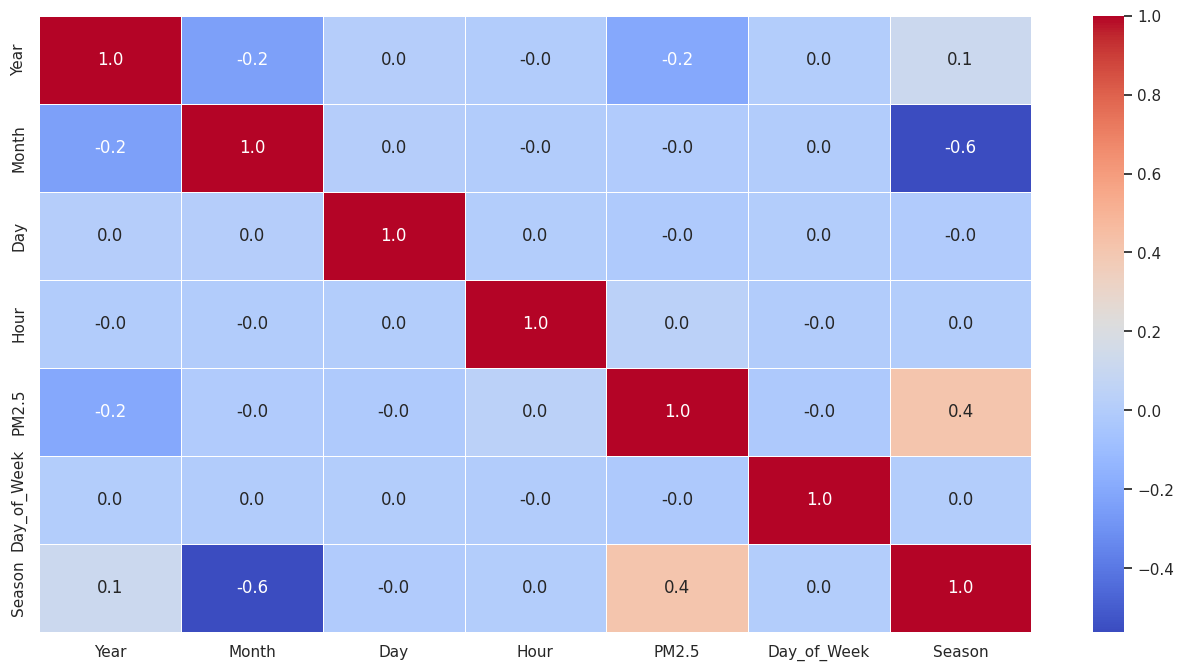

In [34]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True,fmt=".1f",linewidths=.5)
plt.show()

**Split Data into Train and Test**



In [35]:
X = df.drop(["PM2.5"],axis=1)
y = df["PM2.5"]

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, shuffle=True)

In [37]:
X_train

,Year,Month,Day,Hour,Day_of_Week,Season
3525,2018,4,27,11,4,2
32483,2021,12,9,23,3,3
2390,2018,3,1,3,3,2
30351,2021,9,4,4,5,0
25856,2021,2,17,13,2,3
...,...,...,...,...,...,...
16850,2020,1,21,11,1,3
6265,2018,9,10,3,0,0
11284,2019,4,22,5,0,2
860,2017,12,19,22,1,3


In [38]:
pd.DataFrame(y_test)

,PM2.5
23802,77.4400
14854,38.7000
1278,95.2245
12837,18.5000
33196,40.5400
...,...
8237,95.2245
7539,56.8500
16134,73.9800
28474,23.5700


In [39]:
pd.DataFrame(y_train)

,PM2.5
3525,41.8900
32483,54.6500
2390,75.8700
30351,18.5000
25856,46.6500
...,...
16850,58.3700
6265,24.7200
11284,46.7900
860,95.2245


**Models Regression**

In [40]:
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [41]:
def all(model):
    model.fit(X_train,y_train.astype(int))
    y_pred = model.predict(X_test)
    print("score_test=", model.score(X_test ,y_test.astype(int))*100)
    print("score_train=", model.score(X_train ,y_train.astype(int))*100)   
    print("mean_absolute_error=", metrics.mean_absolute_error(y_test, y_pred))

In [42]:
model1=KNeighborsRegressor(n_neighbors=8,algorithm="kd_tree", leaf_size=40)
all(model1)

score_test= 88.81604432248666
score_train= 91.82526988782675
mean_absolute_error= 5.558083506009116


In [43]:
model2=DecisionTreeRegressor()
all(model2)

score_test= 95.16960613097477
score_train= 100.0
mean_absolute_error= 2.955333816825527


In [44]:
model3=LinearRegression()
all(model3)

score_test= 29.35959256968761
score_train= 28.102512706565886
mean_absolute_error= 15.560877359514121


In [45]:
model4=RandomForestRegressor(n_estimators=200,max_depth=6)
all(model4)

score_test= 83.31586234272459
score_train= 83.28609035827823
mean_absolute_error= 7.001734126066868


In [46]:
model5=GradientBoostingRegressor()
all(model5)

score_test= 85.54839788224263
score_train= 85.74544318400983
mean_absolute_error= 6.398419604136974


**The model Decision Tree Regressor is the highest accuracy**

**THANK YOU******